## 1. Importing the Libraries


In [152]:
import pandas as pd 
import numpy as np

## 2. Importing the Dataset

In [153]:
data = pd.read_csv("D:/Top_mentor/Dec/5th_dec/Assignments/Assignments/Healthcare_Analysis_Project_Capstone1/heart.csv")
## show 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

## 3. Taking Care of Missing Values

In [4]:
data.isnull().sum()
## No nullvalues in data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 4. Taking Care of Duplicate Values

In [5]:
data.duplicated().sum()

1

In [6]:
data = data.drop_duplicates()

## 5. Data Processing

In [7]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else: 
        cont_val.append(column)

In [8]:
print('categorical column',cate_val)

categorical column ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [9]:
print('Numerical column',cont_val)

Numerical column ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## 6. Encoding Categorical Data

In [10]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [11]:
## Both columns rae removed due to contain 0 and 1 value, not required encoding 
cate_val.remove('sex')
cate_val.remove('target')

In [12]:
## encode by dumy variables 
data = pd.get_dummies(data,columns = cate_val, drop_first= True ) ## drop_first= True  use to drop main columns
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## 7. Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data[cont_val]

,age,trestbps,chol,thalach,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360
300,1.503322,0.707035,-1.035462,-0.374779,2.032684
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360


## 8. Splitting The Dataset Into The Training Set And Test Set

In [112]:
X=data.drop('target',axis= 1)

In [16]:
y= data['target']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1254)

## 9. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [54]:
## Prediction
log_pred = log.predict(X_test)

## Accuuracy check 
from sklearn.metrics import accuracy_score
log_accuracy = accuracy_score(y_test,log_pred)
print('Logistic Regression Model Accuracy', log_accuracy)

Logistic Regression Model Accuracy 0.8688524590163934


## 10. SVC

In [21]:
from sklearn import svm

clf = svm.SVC() ## Support vector classifier
clf.fit(X_train,y_train)

SVC()

In [56]:
svm_pred = clf.predict(X_test)
svc_accuracy = accuracy_score(y_test,svm_pred)
print('SVCs Model Accuracy', svc_accuracy)

SVCs Model Accuracy 0.819672131147541


## 11. Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

## Model fitting
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

## Accuracy 
print(metrics.confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
dt_accuracy = accuracy_score(y_test, dt_pred)
print('Accuracy score of Decision Tree model=',dt_accuracy)

[[20  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Accuracy score of Decision Tree model= 0.8032786885245902


## 12. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(X_train,y_train)

rf_pred = regressor.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy score of RandomForest model=',rfc_accuracy)

Accuracy score of RandomForest model= 0.8360655737704918


## 13. Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbc = GradientBoostingClassifier()

In [40]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
gbc_pred = gbc.predict(X_test)

In [58]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)

In [59]:
print('Accuracy score of Gradient Boosting Classifier model=',gbc_accuracy)

Accuracy score of Gradient Boosting Classifier model= 0.8360655737704918


## 14. Guassian Naive_bayes model 

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [73]:
gnb_pred = gnb.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gnb_pred)

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [78]:
gnb_accuracy =(21+31)/(21+31+3+6)

## 15. Accuracy identification 

In [93]:
df_score = pd.DataFrame({'Models':['LR', 'SVM','DT', 'RF','GB','GNB'],'Accuracy': [accuracy_score(y_test,log_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test, dt_pred),accuracy_score(y_test, rf_pred),accuracy_score(y_test,gbc_pred),gnb_accuracy]})

In [94]:
df_score

,Models,Accuracy
0,LR,0.868852
1,SVM,0.819672
2,DT,0.803279
3,RF,0.836066
4,GB,0.836066
5,GNB,0.852459


<Axes: xlabel='Models', ylabel='Accuracy'>

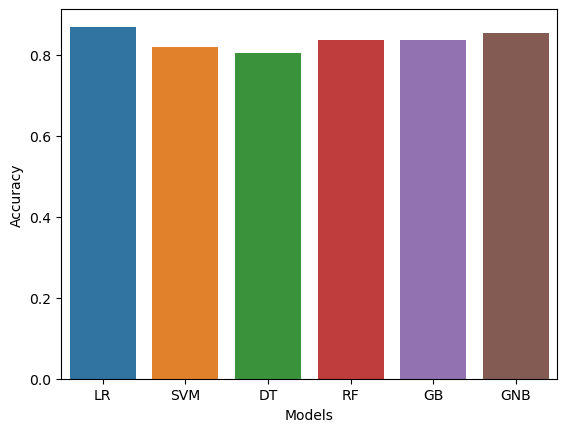

In [97]:
import seaborn as sns 
sns.barplot(x=df_score['Models'],y= df_score['Accuracy'])

## 16. Choose best model for prediction 
1. According to diffrent model LogisticRegression model has provide higher accuracy 

In [115]:
X=data.drop('target',axis= 1)
y= data['target']
log = LogisticRegression()
log.fit(X,y)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 17. Prediction on New Data

In [129]:
## Create new data set for prediction 
new_data =pd.DataFrame({
    'age': 65, 
    'sex':0,
    'cp': 0,
    'trestbps':125,
    'chol':212, 
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [141]:
## Predict 
new_pred = log.predict(new_data)
if new_pred[0]==0:
    print('No Disease detected')
else:
    print("Possibility of Heart Disease")

Possibility of Heart Disease


## 18. Save Model Usign Joblib

In [132]:
import joblib

In [133]:
joblib.dump(log,'Heart_Dieases_Predition_Model')

['Heart_Dieases_Predition_Model']

In [134]:
## Load model 
model_heart = joblib.load('Heart_Dieases_Predition_Model')

In [140]:
## Predict again after loading model 
model_heart.predict(new_data)
if new_pred[0]==0:
    print('No Disease detected')
else:
    print("Possibility of Heart Disease")

Possibility of Heart Disease


## 19. Creating GUI (Graphical User Interface)

In [187]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
from PIL import ImageTk, Image



def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('Heart_Dieases_Predition_Model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()